--------------------------------------------------------------------------------------------------------------------------------
# K-means Clustering

--------------------------------------------------------------------------------------------------------------------------------

#### Things you would learn:

    Use of K-means Clustering 

    Plotting using 3D Axes

    Use of Randomized PCA

    Constructing a function to calculate kmeans(centroids, radius, total distance, etc)  
    
    Plotting elbow curve(k-means)
    
    Compare k-means clustering vs. Actual digits (PCA projections)

    Function deconstruction ( step by step) 
    

##### Duration of excercise : 45min - 90min
    
--------------------------------------------------------------------------------------------------------------------------------

In [2]:
# Importing the required packages
#### Iris Flower Dataset ####

import numpy as np
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
np.random.seed(5)   # Random seed 

#centers = [[1, 1], [-1, -1], [1, -1]]  



In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
est = KMeans(n_clusters=3)
est

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
%matplotlib inline

fig = pl.figure(figsize=(4, 3))
fig.suptitle('k=3', fontsize=14)

pl.clf()

#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#pl.cla()

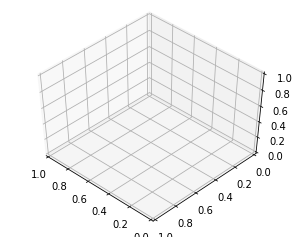

In [7]:
%matplotlib inline

fig = pl.figure(figsize=(4, 3))
fig.suptitle('k=3', fontsize=14)

pl.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pl.cla()

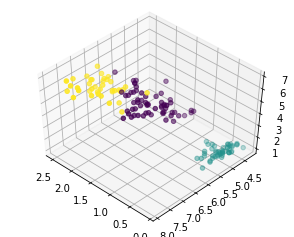

In [8]:

%matplotlib inline

fig = pl.figure(figsize=(4, 3))
fig.suptitle('k=3', fontsize=14)

pl.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pl.cla()


est.fit(X)
labels = est.labels_
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

pl.show()

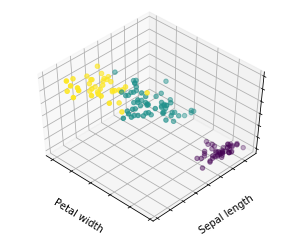

In [9]:
est = KMeans(n_clusters=3)

fig = pl.figure(figsize=(4, 3))
fig.suptitle('k=3', fontsize=14)

pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

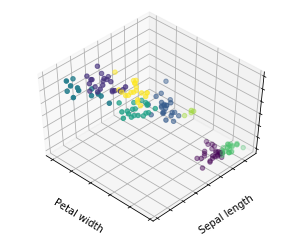

In [10]:
est = KMeans(n_clusters=8)

fig = pl.figure(figsize=(4, 3))
fig.suptitle('k=8', fontsize=14)

pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

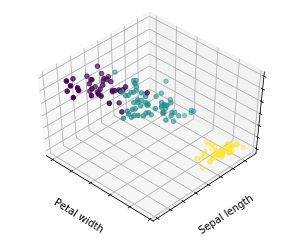

In [11]:
est = KMeans(n_clusters=3, n_init=1, init='random') # bad init

fig = pl.figure(figsize=(4, 3))
fig.suptitle('Random Initialization (k=3)', fontsize=14)

pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

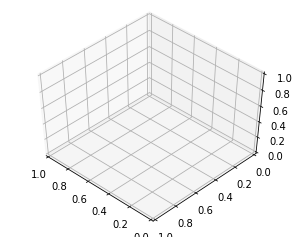

In [12]:
# Plot the ground truth
fig = pl.figure(figsize=(4, 3))
pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()


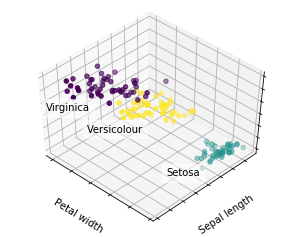

In [13]:
fig = pl.figure(figsize=(4, 3))
pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()



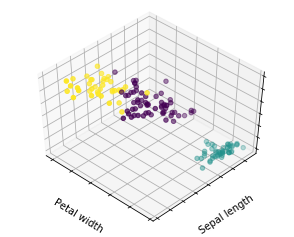

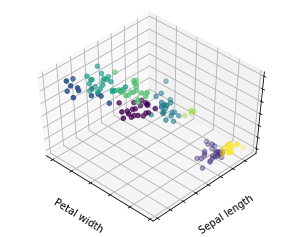

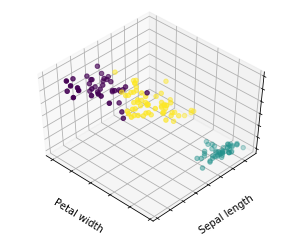

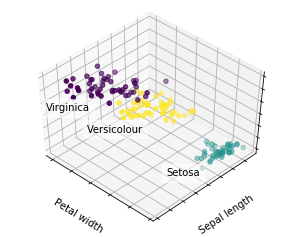

In [14]:
np.random.seed(5)

#centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = pl.figure(fignum, figsize=(4, 3))
    pl.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    pl.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = pl.figure(fignum, figsize=(4, 3))
pl.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

pl.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
pl.show()

In [15]:
# TO do Digits Dataset (PCA)

In [16]:
import numpy as np
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from sklearn.decomposition import RandomizedPCA
from matplotlib import pyplot as plt
from matplotlib import cm

In [17]:
##### data #####
# load digits dataset
data = datasets.load_digits()
t = data['target']

In [18]:
data 

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [19]:
t

array([0, 1, 2, ..., 8, 9, 8])

In [20]:
pca = RandomizedPCA(n_components=2).fit(data['data'])
X = pca.transform(data['data'])
X

C:\Users\MosesAbishekRaj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


array([[ -1.2298257 ,  21.36369045],
       [  7.93283303, -20.87475026],
       [  7.00742041, -10.11486187],
       ..., 
       [ 10.75268802,  -6.91016906],
       [ -4.88717188,  12.57487881],
       [ -0.37285205,   6.476986  ]])

In [22]:
##### cluster data into k=1..20 clusters ##### 

K_MAX = 20 # no ofaximum clusters 
KK = range(1,K_MAX+1)   # giving the range of the clusters 
KM = [kmeans(X,k) for k in KK]  # Kmeans

centroids = [cent for (cent,var) in KM]  # Centroids 

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]  # distance of the point from the centroid "Euclidean"

cIdx = [np.argmin(D,axis=1) for D in D_k] # returns the indices of the minimum values along the axis
dist = [np.min(D,axis=1) for D in D_k]  # returns the minimum distance 

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares



In [32]:
KK

range(1, 21)

In [33]:
centroids

[array([[  6.34377853e-16,  -2.50587901e-16]]),
 array([[ 13.30379649,  10.1559376 ],
        [ -6.32421853,  -4.82782255]]),
 array([[  0.35242234, -12.22859499],
        [-12.53560002,   7.28144627],
        [ 16.13151268,   9.27594017]]),
 array([[  0.675475  , -12.41823227],
        [ 20.13430641,   3.45089035],
        [  4.08505847,  19.0391747 ],
        [-14.57093013,   3.96524223]]),
 array([[-16.98915978,   8.48087508],
        [ 20.22441924,   3.55295751],
        [  4.45665079,  19.45628465],
        [  2.74753305, -14.90777957],
        [ -7.62494053,  -4.05842373]]),
 array([[-14.04038663,  -7.71305973],
        [ 20.55245811,   3.89566271],
        [  4.38567938,  19.94949277],
        [-16.55293782,   9.27333205],
        [  2.9157009 , -16.00843319],
        [ -1.16420001,  -1.73580267]]),
 array([[  2.31854147, -16.29355141],
        [ 16.70542671,  12.45159095],
        [  1.29413054,  21.19710133],
        [ 21.51486768,  -2.2390308 ],
        [-13.97706614,  -7.646

In [31]:
KM

[(array([[  6.34377853e-16,  -2.50587901e-16]]), 17.229080110131477),
 (array([[ 13.30379649,  10.1559376 ],
         [ -6.32421853,  -4.82782255]]), 13.154988888323164),
 (array([[  0.35242234, -12.22859499],
         [-12.53560002,   7.28144627],
         [ 16.13151268,   9.27594017]]), 9.901680730558958),
 (array([[  0.675475  , -12.41823227],
         [ 20.13430641,   3.45089035],
         [  4.08505847,  19.0391747 ],
         [-14.57093013,   3.96524223]]), 8.5223145038550783),
 (array([[-16.98915978,   8.48087508],
         [ 20.22441924,   3.55295751],
         [  4.45665079,  19.45628465],
         [  2.74753305, -14.90777957],
         [ -7.62494053,  -4.05842373]]), 7.4855281168444048),
 (array([[-14.04038663,  -7.71305973],
         [ 20.55245811,   3.89566271],
         [  4.38567938,  19.94949277],
         [-16.55293782,   9.27333205],
         [  2.9157009 , -16.00843319],
         [ -1.16420001,  -1.73580267]]), 6.8317641368335895),
 (array([[  2.31854147, -16.29355141

In [28]:
cIdx

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 0, 0, ..., 0, 1, 1], dtype=int64),
 array([2, 0, 0, ..., 0, 2, 2], dtype=int64),
 array([2, 3, 3, ..., 3, 2, 4], dtype=int64),
 array([2, 4, 4, ..., 4, 2, 5], dtype=int64),
 array([2, 0, 0, ..., 3, 2, 6], dtype=int64),
 array([6, 0, 0, ..., 0, 6, 7], dtype=int64),
 array([6, 2, 7, ..., 7, 8, 8], dtype=int64),
 array([1, 7, 6, ..., 6, 0, 5], dtype=int64),
 array([2, 5, 6, ..., 7, 3, 1], dtype=int64),
 array([ 8, 11,  3, ...,  9,  4,  0], dtype=int64),
 array([10,  7,  1, ...,  2,  4,  3], dtype=int64),
 array([11,  9,  4, ...,  4, 10,  2], dtype=int64),
 array([12,  2,  5, ...,  5,  9, 14], dtype=int64),
 array([ 1, 12,  9, ..., 14,  0,  2], dtype=int64),
 array([11,  7,  1, ..., 10,  4,  4], dtype=int64),
 array([ 0, 11,  7, ...,  7,  9,  9], dtype=int64),
 array([15, 13,  5, ..., 12,  2,  2], dtype=int64),
 array([15,  5,  2, ...,  2, 17, 17], dtype=int64)]

In [29]:
dist

[array([ 21.32057694,  22.22927574,  12.15472319, ...,  12.85227934,
         13.36016248,   6.35577568]),
 array([ 18.32587256,  21.39643546,  14.27007101, ...,  17.26413713,
         17.33865234,  12.67182507]),
 array([ 17.97958443,  11.42910802,   7.03158018, ...,  11.71116595,
          9.25961876,  12.22344773]),
 array([  5.79430198,  11.07307348,   6.79394463, ...,  11.51245173,
         11.10420139,  13.44478941]),
 array([  5.9986527 ,   7.83542184,   6.54181585, ...,  11.32442319,
         11.65140355,  12.69689829]),
 array([  5.79816639,   6.92900405,   7.31763355, ...,  12.01165723,
         11.89937768,   8.12315632]),
 array([  2.55253489,   7.19542802,   7.894678  , ...,  11.69858125,
         10.69170132,   8.16248468]),
 array([  2.38746906,   6.05626955,   4.88037982, ...,   8.21319177,
         10.71338946,   7.58472747]),
 array([  2.71931859,   1.79205657,   3.92129612, ...,   7.24943964,
         10.55460751,   5.89631368]),
 array([ 2.70304342,  2.31337617,  3.

In [34]:
tot_withinss

[615530.03461619001,
 376222.46328427654,
 218279.52155859891,
 154026.47745867676,
 121385.10274288429,
 101726.78155411955,
 84249.074274991741,
 72294.709422296175,
 63420.093424542232,
 56380.13323917229,
 50267.890502480164,
 46515.921402704771,
 43301.309797548405,
 40465.961674668011,
 38435.959429909599,
 36196.676683028527,
 34006.653359578318,
 32340.954082342621,
 30459.557806054767,
 28949.236186260401]

In [35]:
totss

615530.03461615148

In [36]:
betweenss

array([ -3.85334715e-08,   2.39307571e+05,   3.97250513e+05,
         4.61503557e+05,   4.94144932e+05,   5.13803253e+05,
         5.31280960e+05,   5.43235325e+05,   5.52109941e+05,
         5.59149901e+05,   5.65262144e+05,   5.69014113e+05,
         5.72228725e+05,   5.75064073e+05,   5.77094075e+05,
         5.79333358e+05,   5.81523381e+05,   5.83189081e+05,
         5.85070477e+05,   5.86580798e+05])

Text(0.5,1,'Elbow for k-Means Clustering')

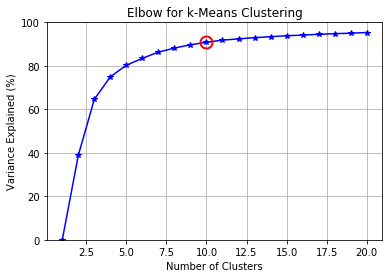

In [24]:
kIdx = 9        # k=10
clr = cm.spectral( np.linspace(0,1,10) ).tolist()

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Explained (%)')
plt.title('Elbow for k-Means Clustering')

In [37]:
clr

[[0.0, 0.0, 0.0, 1.0],
 [0.4287313725490196, 0.0, 0.613078431372549, 1.0],
 [0.0, 0.18301960784313726, 0.8667, 1.0],
 [0.0, 0.6444666666666666, 0.7333666666666667, 1.0],
 [0.0, 0.6091549019607843, 0.07319803921568624, 1.0],
 [0.0, 0.8849960784313726, 0.0, 1.0],
 [0.7999666666666666, 0.9777666666666667, 0.0, 1.0],
 [1.0, 0.6784313725490196, 0.0, 1.0],
 [0.8928372549019608, 0.0, 0.0, 1.0],
 [0.8, 0.8, 0.8, 1.0]]

In [38]:
img = pca.inverse_transform(centroids[kIdx][i]).reshape(8,8)
img

array([[ -8.33317592e-16,   6.12075931e-01,   8.55705506e+00,
          1.37139928e+01,   1.27033897e+01,   7.96234833e+00,
          1.94210485e+00,   1.58909423e-01],
       [  1.10773342e-02,   3.74441769e+00,   1.31772946e+01,
          1.00388507e+01,   1.15940343e+01,   1.14546371e+01,
          2.48491537e+00,   7.34615535e-02],
       [  3.73925924e-03,   3.38508643e+00,   7.29180204e+00,
          4.49199750e+00,   1.10890398e+01,   1.00033599e+01,
          1.20412565e+00,  -4.51542499e-03],
       [  2.19882266e-04,   1.03302780e+00,   4.29069635e+00,
          1.03437542e+01,   1.46833539e+01,   7.75058402e+00,
          1.14688856e+00,  -9.11712541e-04],
       [  0.00000000e+00,  -4.47007362e-01,   2.11357211e+00,
          8.92365503e+00,   1.13133941e+01,   7.00423700e+00,
          1.66338539e+00,   0.00000000e+00],
       [ -1.02690863e-02,  -2.14148452e-01,   1.87705468e+00,
          5.95765008e+00,   7.15703021e+00,   6.26835380e+00,
          2.31029016e+00,  -4.1

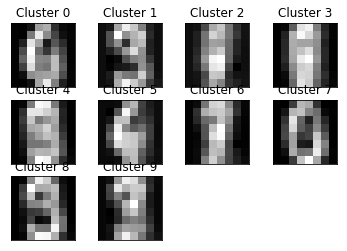

In [25]:
# show centroids for k=10 clusters
plt.figure()
for i in range(kIdx+1):
    img = pca.inverse_transform(centroids[kIdx][i]).reshape(8,8)
    ax = plt.subplot(3,4,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap=cm.gray)
    plt.title( 'Cluster %d' % i )

In [40]:
print(X[ind,0],X[ind,1])

[ -8.07549312 -19.19140898 -19.41049119 -21.57054349  -6.16600622
 -20.24549877 -20.61770206  -8.43995878 -19.64744836 -10.02410908
 -12.01593492 -16.9317481  -21.55134577  -9.56772765  -9.72230988
  -8.96272742 -20.45077178 -18.30703844 -19.8510772  -17.85435553
 -13.51687244 -10.62215988  -7.93447751 -10.75481189 -15.67121927
 -13.26995584 -12.37305097 -10.06328038 -13.27400191 -12.35664261
 -16.32397139 -15.53643586 -15.05435705 -16.02235666 -15.99048186
  -7.2314872  -13.70915431 -11.4495428  -12.93543729  -7.63199218
 -10.19380418  -6.05648819 -10.39416281 -11.63926444 -12.45558605
 -11.75478573  -9.00195716 -11.13656264  -5.13011209 -10.31606761
 -12.69286438  -6.27626052 -10.5187834  -12.94612114  -7.62961862
 -18.96187783  -7.4019119  -11.27341342 -15.86053533 -10.56910045
 -14.4608849  -14.59928443 -15.07285208 -10.95628594 -10.07900449
  -9.71210957 -13.58522908 -16.82830562 -13.83447959 -13.31023609
 -12.39442421 -11.55807036 -13.53451639  -9.86835351 -12.57110649
  -9.39282

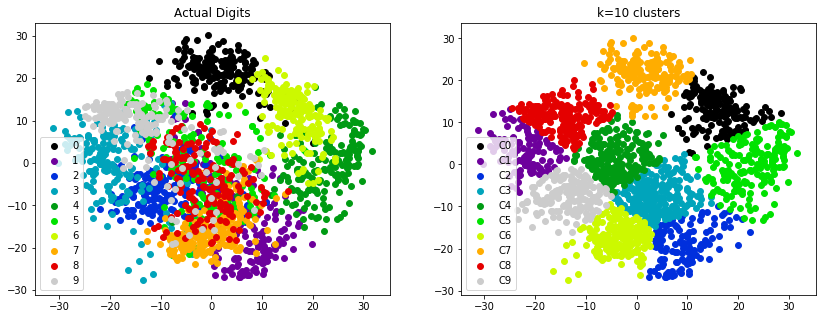

In [26]:
# compare k=10 clustering vs. actual digits (PCA projections)

#Plotting the actual digits
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121)
for i in range(10):
    ind = (t==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], label='%d'%i)
plt.legend()
plt.title('Actual Digits')

# Plotting the clusters 
ax = fig.add_subplot(122)
for i in range(kIdx+1):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], label='C%d'%i)
plt.legend()
plt.title('k=%d clusters'%KK[kIdx])

plt.show()